# Performance Metric for Logistic Regression

F1 Score: 0.790  
AUC score: 0.796  
Acurracy : 0.796  

True Positive Rate (TPR): 0.7650332225913621  
False Positive Rate (FPR): 0.1734531105700613  
True Negative Rate (TNR): 0.8265468894299387  
False Negative Rate (FNR): 0.23496677740863786  

Top 4 variables: job_unemployed, job_technician, job_services, job_self-employed

# Performance Metrics for Random Forest

F1 Score: 0.794  
AUC score: 0.804   
Acurracy : 0.804   

True Positive Rate (TPR): 0.8193633952254642   
False Positive Rate (FPR): 0.21936555652242704   
True Negative Rate (TNR): 0.7806344434775729  
False Negative Rate (FNR): 0.1806366047745358     

Top 4 variables: housing_yes, job_blue-collar, loan_yes, marital_married

# Performance Metrics for XGBoost

F1 Score: 0.280     
AUC: 0.668    
Accuracy: 0.820     

True Positive Rate (TPR): 0.29162833486660533  
False Positive Rate (FPR): 0.10773098680075424   
True Negative Rate (TNR): 0.8922690131992458   
False Negative Rate (FNR): 0.7083716651333947 

Top 4 Variables: housing_yes, job_blue-collar, loan_yes, job_housemaid

# Comparison

By comparing between Logistic Regression, Random Forest and XGBoost, we can conclude that Random Forest is the best model in predicting whether a future customer will made a term deposit.

The higher F1 score of the Random Forest model implies a better balance between precision and sensitivity, especially for dataset with imbalanced class distributions such as deposit=0 significantly outweigh deposit=1. Additionally, its higher AUC score indicates improved discriminative ability, enhancing its capability to distinguish between positive and negative instances.   

Random forest has higher True Positive Rate (TPR) signifies a greater probability to correctly identify positive instances of whether a customer will make a term deposit, which is crucial in marketing campaigns to maximise the success rate.

Random Forest's strengths lie in its ability to effectively handle non-linear relationships between features while minimising the risk of overfitting, making it as a robust algorithm.

According to the feature importances obtained from Random Forest, the top 4 most important variables in predicting the characteristics of the future potential customers are with housing loan, work as a blue collar, with personal loan and married.

# Link Back to EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
noncustomer = pd.read_csv('non_customer_bank_marketing_data.csv')
customer = pd.read_csv('customer_bank_marketing_data.csv')

# Non-Customer Data

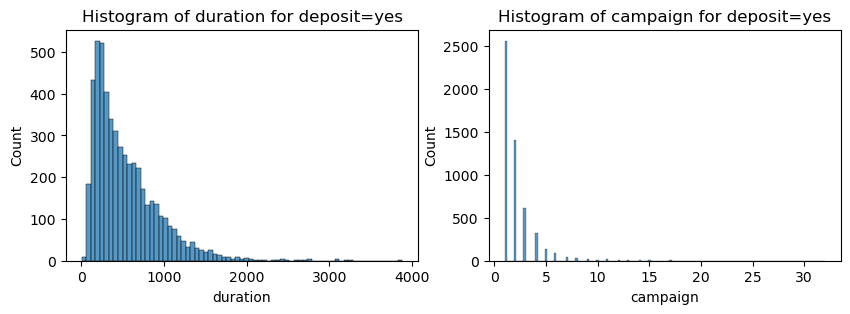

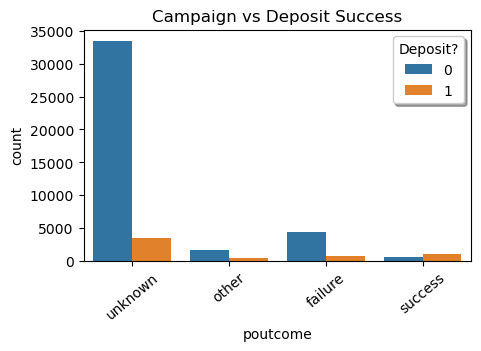

In [3]:
#plotting the histogram for the variables when deposit=1

numcols = pd.DataFrame(noncustomer[['duration','campaign']])
f, axes = plt.subplots(1, 2, figsize=(10,3))
count = 0
for var in numcols:
    sb.histplot(data=noncustomer[noncustomer['deposit_num'] == 1][var], ax=axes[count])
    axes[count].set_title(f'Histogram of {var} for deposit=yes')
    count+=1
    
plt.figure(figsize=(5, 3))
axes = sb.countplot(x='poutcome', hue='deposit_num', data=noncustomer)
axes.set_title(f'{var.capitalize()} vs Deposit Success')
axes.set_xticklabels(axes.get_xticklabels(), rotation = 40)
axes.legend(title='Deposit?', ncol=1, fancybox=True, shadow=True) 

## Recall that during our EDA, we discovered several non-customer insights:

The duration range with the highest deposit success rate is between 208 to 258 seconds.   
The number of calls performed during the campaign where the deposit success rate is the highest, is between 1 to 3.   
Unfortunately, the outcome of the previous campaign is unknown, which limits its usefulness.  

This is because rather than inundating potential customers with numerous and lenghty calls, focusing on a smaller number of well-timed interactions may result in better reception and response rates. Hence, higher success deposit rate.

# Customer Data

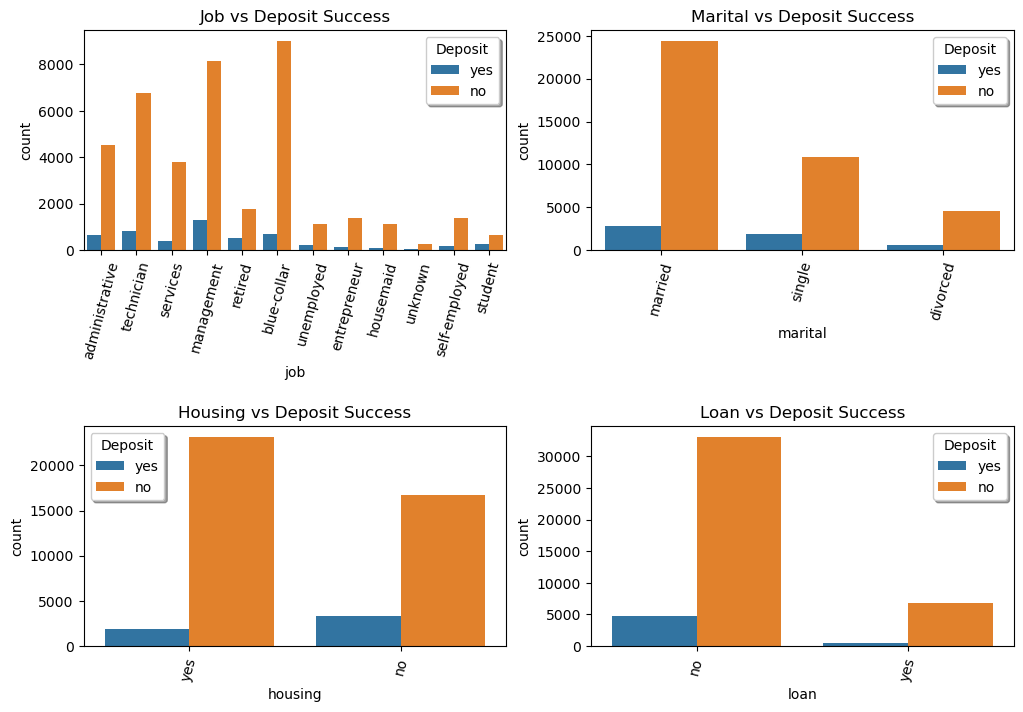

In [4]:
catcols = ['job', 'marital', 'housing', 'loan'] 
f, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  

for i, var in enumerate(catcols):
    sb.countplot(x=var, hue='deposit', data=customer, ax=axes[i])
    axes[i].set_title(f'{var.capitalize()} vs Deposit Success')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)
    axes[i].legend(title='Deposit', ncol=1, fancybox=True, shadow=True) 
plt.subplots_adjust(hspace=0.8)
plt.show()

## Remember that in EDA we predict the potential future customers who are likely to subscribe to a term deposit are individuals who:
- work in management roles  
- married   
- do not have a housing loan  
- do not have a personal loan 

## whereas from Random Forest, we predict the future customers:    
- work as blue collars    
- married   
- have a housing loan  
- have a personal loan  

This is opposite with what we get from the Random Forest. This is because the ability of random forest models to uncover complex interactions between variables, which may not be readily apparent from EDA alone. While EDA provides a visual exploration of individual features, random forest models is better at capturing complex relationships between multiple variables. 

Additionally, random forest models can effectively model non-linear relationships between different variables and the target variable deposit, which may not be fully revealed by using EDA. Random forest models assign importance to different variables based on their predictive power in the entire dataset, leading to different conclusions compared to EDA. 

# Conclusion

## Hence, we can conclude that the marketing campaign should focus on customers:   
- work as blue collars
- married
- have house loan
- have personal loan

## Employees can also interact with the customers in such way:
- Ensure the duration of call is between 208 to 258 seconds.
- Call the customers between 1 to 3 times during campaign.

By focusing more on these groups of customer, the success rate of the campaign will likely to increase and more customers will make a term deposit.

# Note

The difference in the top 4 variables between the logistic regression model and the random forest model arises from their difference in modeling methodology and feature evaluation. 

Logistic regression, being a linear model, assesses feature importance based on the magnitude of coefficients assigned to each variable. This method emphasizes variables with strong linear relationships to the outcome of deposit but may overlook complex nonlinear patterns. 

On the other hand, random forest evaluates feature importance by measuring the decrease in impurity across all trees. This approach is better at capturing non-linear relationships and interactions among the variables, providing a more comprehensive understanding of the data. 